<a href="https://colab.research.google.com/github/chinmaykadu/ck/blob/main/Credit%20Risk%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

%matplotlib inline


In [16]:
url = 'https://raw.githubusercontent.com/chinmaykadu/ck/main/bankloans.csv'
df = pd.read_csv(url)
df.head()

,age,education,workex,income,debtinc,creddebt,othdebt,default
0,41,3,17,176,9.3,11.359392,5.008608,1.0
1,27,1,10,31,17.3,1.362202,4.000798,0.0
2,40,1,15,55,5.5,0.856075,2.168925,0.0
3,41,1,15,120,2.9,2.658720,0.821280,0.0
4,24,2,2,28,17.3,1.787436,3.056564,1.0


In [17]:
df.isnull().sum()

age            0
education      0
workex         0
income         0
debtinc        0
creddebt       0
othdebt        0
default      450
dtype: int64

In [18]:
df.value_counts()

age  education  workex  income  debtinc  creddebt  othdebt    default
20   1          4       14      9.7      0.200984  1.157016   1.0        1
39   1          10      31      4.8      0.184512  1.303488   0.0        1
                0       39      7.9      1.066026  2.014974   0.0        1
                2       22      23.1     1.915914  3.166086   1.0        1
                4       33      7.0      0.397320  1.912680   0.0        1
                                                                        ..
30   2          8       56      6.4      0.333312  3.250688   0.0        1
                10      22      16.1     1.409716  2.132284   0.0        1
                12      68      20.1     2.856612  10.811388  0.0        1
                        98      7.2      2.935296  4.120704   0.0        1
56   1          11      59      15.0     4.672800  4.177200   0.0        1
Length: 700, dtype: int64

In [19]:
df = df.dropna()

<Axes: xlabel='age', ylabel='income'>

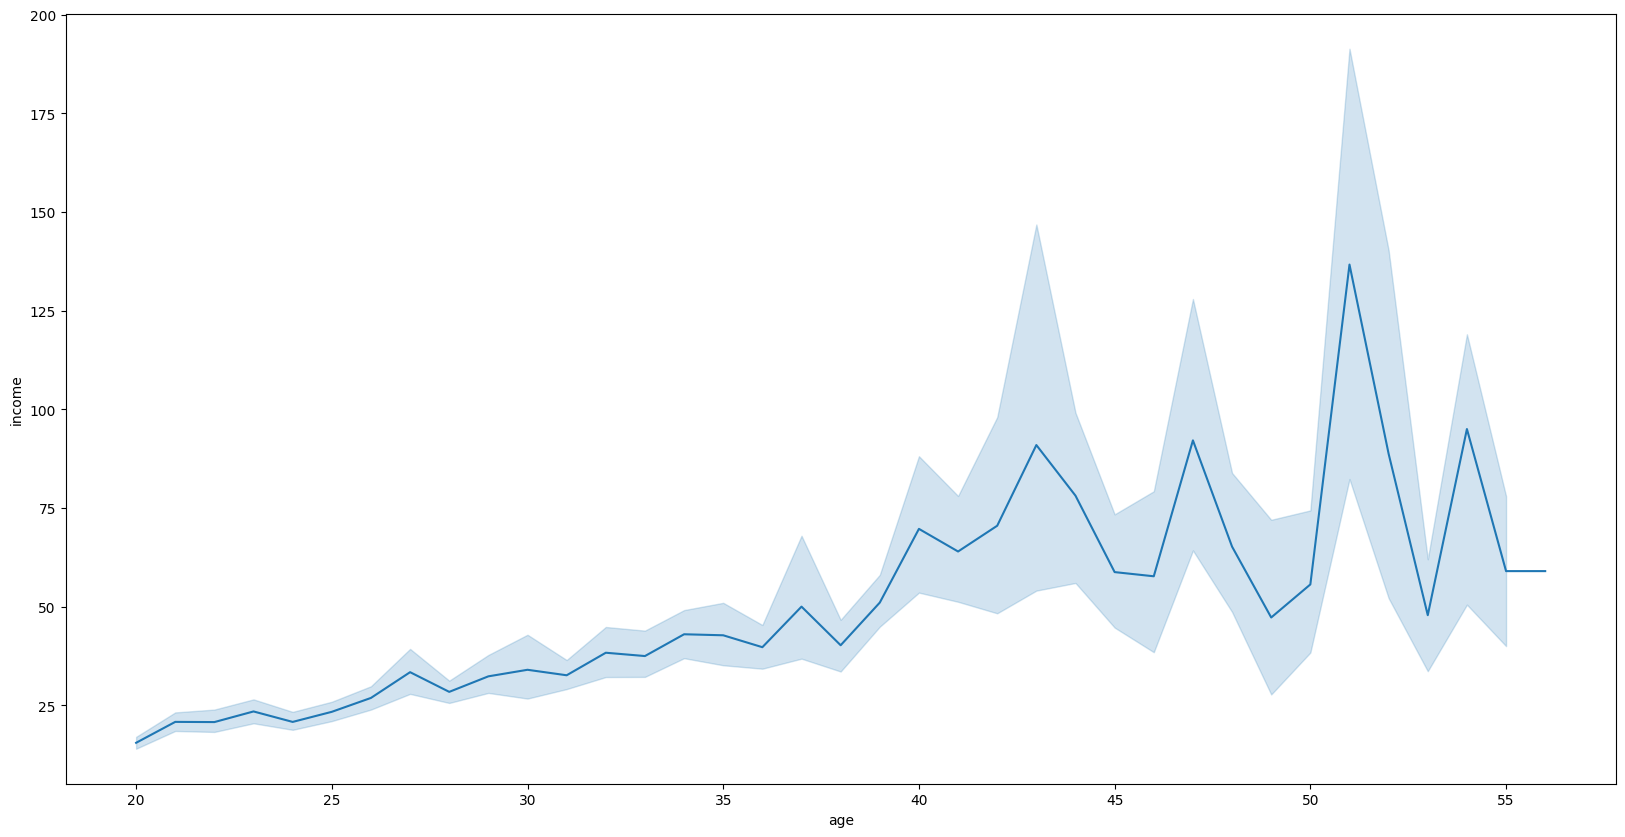

In [21]:
fig,ax = plt.subplots(figsize=(20,10))
sbn.lineplot(x='age',y='income',data=df,ax=ax)

<Axes: xlabel='age', ylabel='debtinc'>

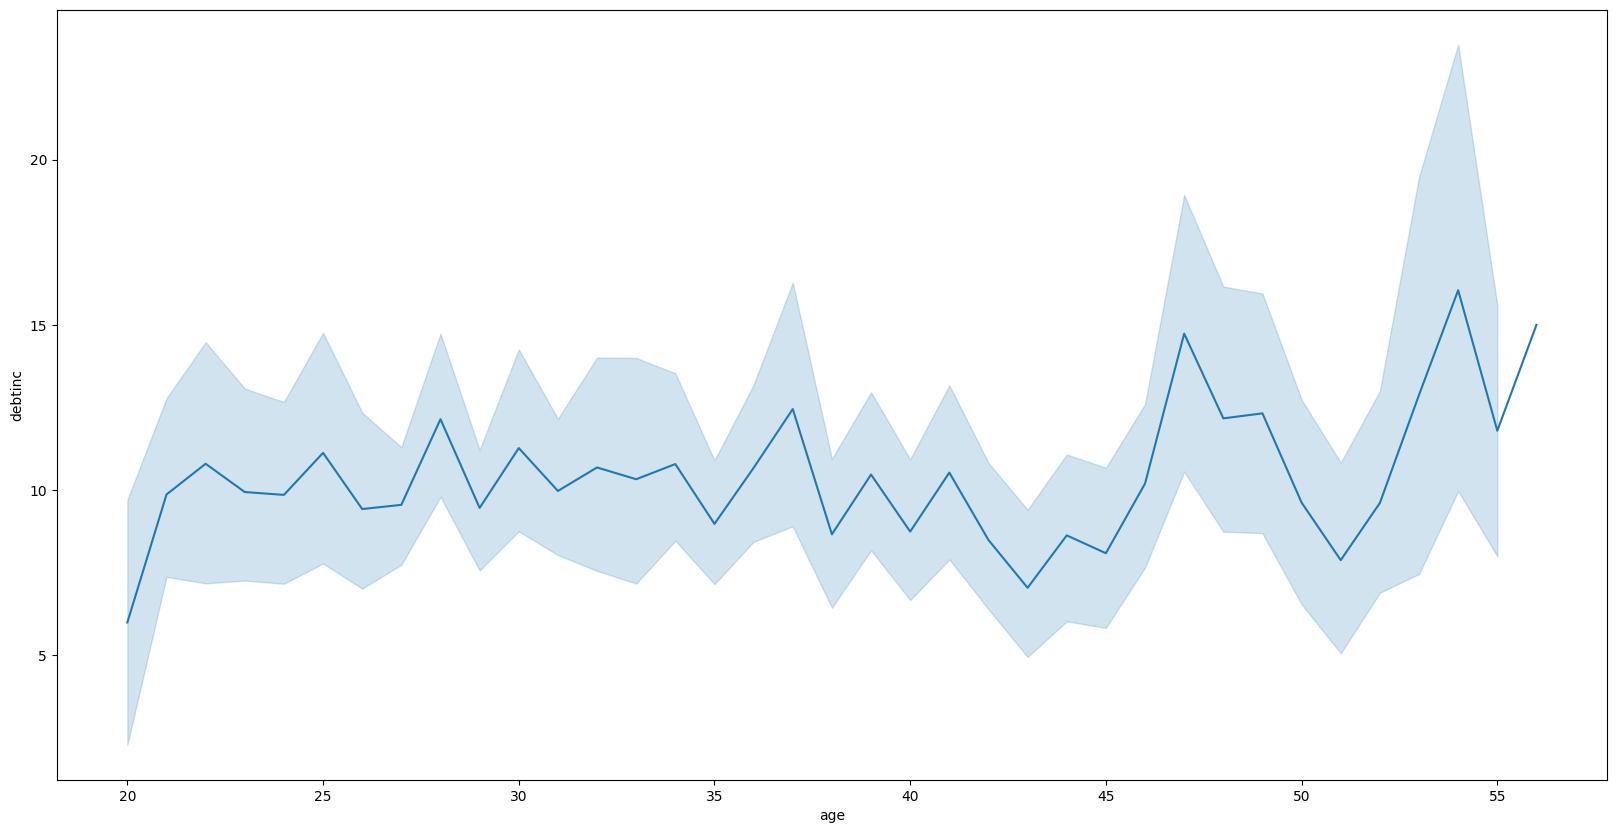

In [22]:
fig,ax = plt.subplots(figsize=(20,10))
sbn.lineplot(x='age',y='debtinc',data=df,ax=ax)

In [23]:
df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [24]:
x=df.drop(['default'],axis=1)
y=df['default']

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
sc = StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

**Creating Model**

In [27]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.8714285714285714

<Axes: >

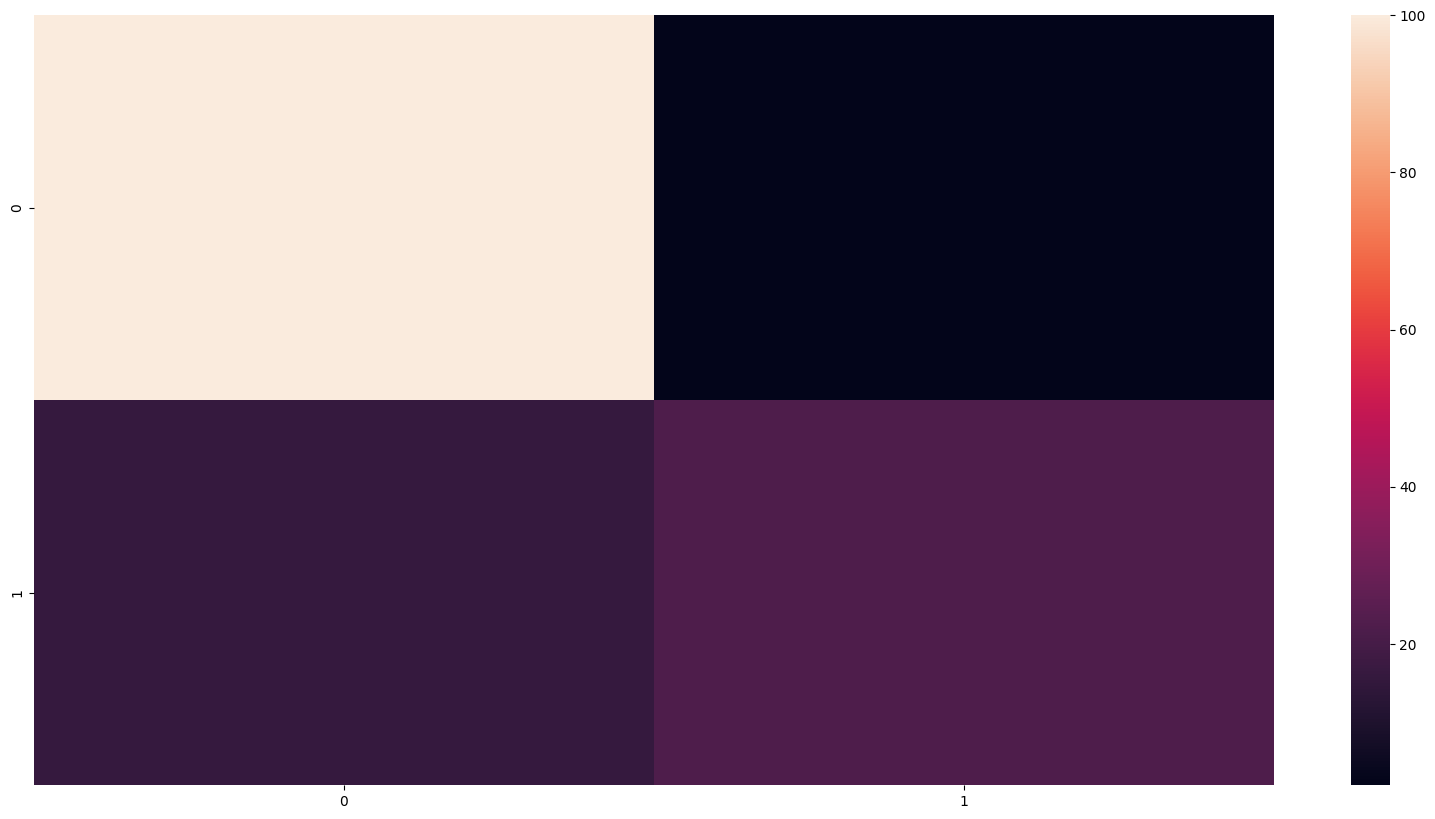

In [28]:
yp = lr.predict(xtest)
c= confusion_matrix(ytest,yp)
fig ,ax = plt.subplots(figsize=(20,10))
sbn.heatmap(c,ax=ax)